# Project 1: Predicting the Location of Mass Shooting Events

In this project we use a variety of classification models to attempt to predict the location of mass shooting events. We will do this by analyzing the mental health history and signs of being in a crisis 6 moths prior to the shooting.   

# Libraries 

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import sys
import seaborn as sns
import plotly.express as px # graphing interactive map from data
sys.setrecursionlimit(10000000)

# Render our plots inline
%matplotlib inline
# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7)# Start writing code here...# Start writing code here...

# Import the Data

In [265]:
mass_shootings = pd.read_excel('/work/Violence-Project-Mass-Shooter-Database-Version-5-May-2022 (2).xlsx', sheet_name='Full Database', header=1)
mass_shootings

Case # Shooter Last Name Shooter First Name  Full Date Day of Week  Day  \
0        1           Whitman            Charles 1966-08-01      Monday    1   
1        2             Smith             Robert 1966-11-12    Saturday   12   
2        3              Held                Leo 1967-10-23      Monday   23   
3        4           Pearson               Eric 1968-03-16    Saturday   16   
4        5         Lambright             Donald 1969-04-05    Saturday    5   
..     ...               ...                ...        ...         ...  ...   
176    178  Gaxiola Gonzalez           Aminadab 2021-03-31   Wednesday   31   
177    179              Hole      Brandon Scott 2021-04-15    Thursday   15   
178    180           Cassidy             Samuel 2021-05-26   Wednesday   26   
179    181          Crumbley              Ethan 2021-11-30     Tuesday   30   
180    182           Gendron             Payton 2022-05-14    Saturday   14   

     Month  Year                      Shooting Location Address  \
0        8  1966       110 Inner Campus Drive, Austin, TX 78705   
1       11  1966         Rose-Mar College of Beauty in Mesa, AZ   
2       10  1967  599 South Highland Street Lockhaven, PA 17745   
3        3  1968              11703 Lake Rd, Ironwood, MI 49938   
4        4  1969      Pennsylvania Turnpike near Harrisburg, PA   
..     ...   ...                                            ...   
176      3  2021       202 West Lincoln Avenue Orange, CA 92865   
177      4  2021        8951 Mirabel Rd, Indianapolis, IN 46241   
178      5  2021          101 W Younger Ave, San Jose, CA 95110   
179     11  2021              745 N Oxford Rd, Oxford, MI 48371   
180      5  2022          1275 Jefferson Ave, Buffalo, NY 14208   

              City  ... Interest in Firearms  Firearm Proficiency  \
0           Austin  ...                  1.0                  3.0   
1             Mesa  ...                  0.0                  1.0   
2       Lock Haven  ...                  1.0                  3.0   
3         Ironwood  ...                  0.0                  0.0   
4       Harrisburg  ...                  0.0                  3.0   
..             ...  ...                  ...                  ...   
176         Orange  ...                  0.0                  0.0   
177  Indianapolis   ...                  0.0                  0.0   
178       San Jose  ...                  1.0                  0.0   
179         Oxford  ...                  1.0                  1.0   
180       Buffalo   ...                  1.0                  3.0   

     Total Firearms Brought to the Scene  Other Weapons or Gear  \
0                                    7.0                    1.0   
1                                    1.0                    1.0   
2                                    2.0                    1.0   
3                                    1.0                    0.0   
4                                    2.0                    0.0   
..                                   ...                    ...   
176                                  1.0                    1.0   
177                                  2.0                    0.0   
178                                  3.0                    1.0   
179                                  1.0                    0.0   
180                                  1.0                    1.0   

                         Specify Other Weapons or Gear  On-Scene Outcome  \
0    hatchet, hammer, knives, wrench, ropes, water,...               1.0   
1                                    knife, nylon cord               2.0   
2                                              holster               1.0   
3                                                  NaN               2.0   
4                                                  NaN               0.0   
..                                                 ...               ...   
176  pepper spray, handcuffs, ammunition, locked ex...               2.0   
177     

## Select the Variables of Interest

In [266]:
my_data = mass_shootings[['Age', 'Gender', 'Race', 'Education','Location', 'City', 'State', 'Region', 'Suicidality', 
                        'Voluntary or Involuntary Hospitalization','Prior Hospitalization', 'Prior Counseling', 
                        'Voluntary or Mandatory Counseling', 'Recent or Ongoing Stressor', 'Signs of Being in Crisis',
                        'Timeline of Signs of Crisis', 'Leakage ', 'Leakage How', 'Leakage Who ', 'Number Killed', 'Number Injured']]
my_data

Age  Gender  Race  Education  Location           City State  Region  \
0    25.0     0.0   0.0        2.0         1         Austin    TX       0   
1    18.0     0.0   0.0        0.0         4           Mesa    AZ       3   
2    39.0     0.0   0.0        2.0         9     Lock Haven    PA       2   
3    56.0     0.0   0.0        NaN         5       Ironwood    MI       0   
4    31.0     0.0   1.0        2.0         8     Harrisburg    PA       2   
..    ...     ...   ...        ...       ...            ...   ...     ...   
176  44.0     0.0   2.0        NaN         6         Orange    CA       3   
177  19.0     0.0   0.0        0.0         9  Indianapolis     IN       1   
178  57.0     0.0   0.0        2.0         9       San Jose    CA       3   
179  15.0     0.0   0.0        0.0         0         Oxford    MI       1   
180  18.0     0.0   0.0        2.0         4       Buffalo     NY       2   

     Suicidality  Voluntary or Involuntary Hospitalization  ...  \
0            2.0                                       0.0  ...   
1            1.0                                       0.0  ...   
2            2.0                                       0.0  ...   
3            0.0                                       0.0  ...   
4            1.0                                       0.0  ...   
..           ...                                       ...  ...   
176          0.0                                       0.0  ...   
177          1.0                                       0.0  ...   
178          1.0                                       0.0  ...   
179          0.0                                       0.0  ...   
180          1.0                                       2.0  ...   

     Prior Counseling  Voluntary or Mandatory Counseling  \
0                 1.0                                  1   
1                 0.0                                  0   
2                 0.0                                  0   
3                 0.0                                  0   
4                 0.0                                  0   
..                ...                                ...   
176               0.0                                  0   
177               1.0                                  1   
178               0.0                                  0   
179               0.0                                  0   
180               1.0                                  2   

    Recent or Ongoing Stressor Signs of Being in Crisis  \
0                            4                      1.0   
1                            0                      1.0   
2                            2                      1.0   
3                            1                      0.0   
4                            2                      1.0   
..                         ...                      ...   
176                          0                      0.0   
177                       2, 4                      1.0   
178                          2                      1.0   
179                          0                      1.0   
180                        NaN                      NaN   

     Timeline of Signs of Crisis  Leakage           Leakage How Leakage Who   \
0                            2.0       1.0                    0            0   
1                            3.0       0.0                  NaN          NaN   
2                            2.0       0.0                  NaN          NaN   
3                            NaN       0.0                  NaN          NaN   
4                            0.0       0.0                  NaN          NaN   
..                           ...       ...                  ...          ...   
176                          NaN       0.0                  NaN          NaN   
177                          3.0       0.0                  NaN          NaN   
178                          3.0       1.0                 0, 2         2, 9   
179                          2.0       1.0    

# Clean the Data

Use fillna() to replace nulls with -1 to retain all rows. A work around will include code to exclude rows with -1 values in particular regression models that utilize variables with heavy amounts of nulls so as to not skew data and still have accurate models

In [267]:
my_data = my_data.fillna(value='-1')
my_data

Age Gender Race Education  Location           City State  Region  \
0    25.0    0.0  0.0       2.0         1         Austin    TX       0   
1    18.0    0.0  0.0       0.0         4           Mesa    AZ       3   
2    39.0    0.0  0.0       2.0         9     Lock Haven    PA       2   
3    56.0    0.0  0.0        -1         5       Ironwood    MI       0   
4    31.0    0.0  1.0       2.0         8     Harrisburg    PA       2   
..    ...    ...  ...       ...       ...            ...   ...     ...   
176  44.0    0.0  2.0        -1         6         Orange    CA       3   
177  19.0    0.0  0.0       0.0         9  Indianapolis     IN       1   
178  57.0    0.0  0.0       2.0         9       San Jose    CA       3   
179  15.0    0.0  0.0       0.0         0         Oxford    MI       1   
180  18.0    0.0  0.0       2.0         4       Buffalo     NY       2   

    Suicidality Voluntary or Involuntary Hospitalization  ...  \
0           2.0                                      0.0  ...   
1           1.0                                      0.0  ...   
2           2.0                                      0.0  ...   
3           0.0                                      0.0  ...   
4           1.0                                      0.0  ...   
..          ...                                      ...  ...   
176         0.0                                      0.0  ...   
177         1.0                                      0.0  ...   
178         1.0                                      0.0  ...   
179         0.0                                      0.0  ...   
180         1.0                                      2.0  ...   

    Prior Counseling Voluntary or Mandatory Counseling  \
0                1.0                                 1   
1                0.0                                 0   
2                0.0                                 0   
3                0.0                                 0   
4                0.0                                 0   
..               ...                               ...   
176              0.0                                 0   
177              1.0                                 1   
178              0.0                                 0   
179              0.0                                 0   
180              1.0                                 2   

    Recent or Ongoing Stressor Signs of Being in Crisis  \
0                            4                      1.0   
1                            0                      1.0   
2                            2                      1.0   
3                            1                      0.0   
4                            2                      1.0   
..                         ...                      ...   
176                          0                      0.0   
177                       2, 4                      1.0   
178                          2                      1.0   
179                          0                      1.0   
180                         -1                       -1   

    Timeline of Signs of Crisis Leakage           Leakage How Leakage Who   \
0                           2.0      1.0                    0            0   
1                           3.0      0.0                   -1           -1   
2                           2.0      0.0                   -1           -1   
3                            -1      0.0                   -1           -1   
4                           0.0      0.0                   -1           -1   
..                          ...      ...                  ...          ...   
176                          -1      0.0                   -1           -1   
177                         3.0      0.0                   -1           -1   
178                         3.0      1.0                 0, 2         2, 9   
179                         2.0      1.0              5, 3, 4      7, 7, 9   
180                          -1      1.0  2022-04-04 00:00:00      9, 6,

In [268]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Age                                       181 non-null    object
 1   Gender                                    181 non-null    object
 2   Race                                      181 non-null    object
 3   Education                                 181 non-null    object
 4   Location                                  181 non-null    int64 
 5   City                                      181 non-null    object
 6   State                                     181 non-null    object
 7   Region                                    181 non-null    int64 
 8   Suicidality                               181 non-null    object
 9   Voluntary or Involuntary Hospitalization  181 non-null    object
 10  Prior Hospitalization                     181 non-

## Re-Code Columns

We can see that there are no null or N/A values. However some rows contain multiple responses for some variables. We need to re-code them to indicate multiple responses were given.

- Recent or Ongoing Stressors = 7

- Voluntary or Mandatory Counseling = 3

- Leakage How = 6

- Leakage Who = 10

In [269]:
my_data.loc[my_data['Recent or Ongoing Stressor'].str.contains(', ', na=False), 'Recent or Ongoing Stressor'] = 7
my_data.loc[my_data['Voluntary or Mandatory Counseling'].str.contains(', ', na=False), 'Voluntary or Mandatory Counseling'] = 3
my_data.loc[my_data['Leakage How'].str.contains(', ', na=False), 'Leakage How'] = 6
my_data.loc[my_data['Leakage Who '].str.contains(', ', na=False), 'Leakage Who '] = 10

In [270]:
my_data

Age Gender Race Education  Location           City State  Region  \
0    25.0    0.0  0.0       2.0         1         Austin    TX       0   
1    18.0    0.0  0.0       0.0         4           Mesa    AZ       3   
2    39.0    0.0  0.0       2.0         9     Lock Haven    PA       2   
3    56.0    0.0  0.0        -1         5       Ironwood    MI       0   
4    31.0    0.0  1.0       2.0         8     Harrisburg    PA       2   
..    ...    ...  ...       ...       ...            ...   ...     ...   
176  44.0    0.0  2.0        -1         6         Orange    CA       3   
177  19.0    0.0  0.0       0.0         9  Indianapolis     IN       1   
178  57.0    0.0  0.0       2.0         9       San Jose    CA       3   
179  15.0    0.0  0.0       0.0         0         Oxford    MI       1   
180  18.0    0.0  0.0       2.0         4       Buffalo     NY       2   

    Suicidality Voluntary or Involuntary Hospitalization  ...  \
0           2.0                                      0.0  ...   
1           1.0                                      0.0  ...   
2           2.0                                      0.0  ...   
3           0.0                                      0.0  ...   
4           1.0                                      0.0  ...   
..          ...                                      ...  ...   
176         0.0                                      0.0  ...   
177         1.0                                      0.0  ...   
178         1.0                                      0.0  ...   
179         0.0                                      0.0  ...   
180         1.0                                      2.0  ...   

    Prior Counseling Voluntary or Mandatory Counseling  \
0                1.0                                 1   
1                0.0                                 0   
2                0.0                                 0   
3                0.0                                 0   
4                0.0                                 0   
..               ...                               ...   
176              0.0                                 0   
177              1.0                                 1   
178              0.0                                 0   
179              0.0                                 0   
180              1.0                                 2   

    Recent or Ongoing Stressor Signs of Being in Crisis  \
0                            4                      1.0   
1                            0                      1.0   
2                            2                      1.0   
3                            1                      0.0   
4                            2                      1.0   
..                         ...                      ...   
176                          0                      0.0   
177                          7                      1.0   
178                          2                      1.0   
179                          0                      1.0   
180                         -1                       -1   

    Timeline of Signs of Crisis Leakage           Leakage How Leakage Who   \
0                           2.0      1.0                    0            0   
1                           3.0      0.0                   -1           -1   
2                           2.0      0.0                   -1           -1   
3                            -1      0.0                   -1           -1   
4                           0.0      0.0                   -1           -1   
..                          ...      ...                  ...          ...   
176                          -1      0.0                   -1           -1   
177                         3.0      0.0                   -1           -1   
178                         3.0      1.0                    6           10   
179                         2.0      1.0                    6           10   
180                          -1      1.0  2022-04-04 00:00:00           

Lets also re-code the location column: 0= K-12 School ---> 11.

In [271]:
my_data['Location'] = my_data['Location'].replace([0],11)

## Remove Outliers 

Row 144 has a lot of missing data, and row 152 is an outlier. Lets drop those rows.

In [272]:
# deleting that row and the vegas outlier
my_data.drop([144], axis=0, inplace = True)
my_data.drop([152], axis=0, inplace = True)
# We can also drop row 180 due to mis-matched data types
my_data.drop([180], axis=0, inplace = True)
my_data.reset_index()

index   Age Gender Race Education  Location           City State  Region  \
0        0  25.0    0.0  0.0       2.0         1         Austin    TX       0   
1        1  18.0    0.0  0.0       0.0         4           Mesa    AZ       3   
2        2  39.0    0.0  0.0       2.0         9     Lock Haven    PA       2   
3        3  56.0    0.0  0.0        -1         5       Ironwood    MI       0   
4        4  31.0    0.0  1.0       2.0         8     Harrisburg    PA       2   
..     ...   ...    ...  ...       ...       ...            ...   ...     ...   
173    175  21.0    0.0  4.0       1.0         4        Boulder    CO       3   
174    176  44.0    0.0  2.0        -1         6         Orange    CA       3   
175    177  19.0    0.0  0.0       0.0         9  Indianapolis     IN       1   
176    178  57.0    0.0  0.0       2.0         9       San Jose    CA       3   
177    179  15.0    0.0  0.0       0.0        11         Oxford    MI       1   

    Suicidality  ... Prior Counseling Voluntary or Mandatory Counseling  \
0           2.0  ...              1.0                                 1   
1           1.0  ...              0.0                                 0   
2           2.0  ...              0.0                                 0   
3           0.0  ...              0.0                                 0   
4           1.0  ...              0.0                                 0   
..          ...  ...              ...                               ...   
173         0.0  ...              0.0                                 0   
174         0.0  ...              0.0                                 0   
175         1.0  ...              1.0                                 1   
176         1.0  ...              0.0                                 0   
177         0.0  ...              0.0                                 0   

    Recent or Ongoing Stressor Signs of Being in Crisis  \
0                            4                      1.0   
1                            0                      1.0   
2                            2                      1.0   
3                            1                      0.0   
4                            2                      1.0   
..                         ...                      ...   
173                          0                      1.0   
174                          0                      0.0   
175                          7                      1.0   
176                          2                      1.0   
177                          0                      1.0   

    Timeline of Signs of Crisis Leakage  Leakage How Leakage Who   \
0                           2.0      1.0           0            0   
1                           3.0      0.0          -1           -1   
2                           2.0      0.0          -1           -1   
3                            -1      0.0          -1           -1   
4                           0.0      0.0          -1           -1   
..                          ...      ...         ...          ...   
173                         3.0      0.0          -1           -1   
174                          -1      0.0          -1           -1   
175                         3.0      0.0          -1           -1   
176                         3.0      1.0           6           10   
177                         2.0      1.0           6           10   

    Number Killed Number Injured  
0              15             31  
1               5              2  
2               6              6  
3               7              2  
4               4             17  
..            ...            ...  
173            10              1  
174             4              1  
175             8              7  
176             9              0  
177             4              7  

[178 rows x 22 columns]

In [273]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 179
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Age                                       178 non-null    object
 1   Gender                                    178 non-null    object
 2   Race                                      178 non-null    object
 3   Education                                 178 non-null    object
 4   Location                                  178 non-null    int64 
 5   City                                      178 non-null    object
 6   State                                     178 non-null    object
 7   Region                                    178 non-null    int64 
 8   Suicidality                               178 non-null    object
 9   Voluntary or Involuntary Hospitalization  178 non-null    object
 10  Prior Hospitalization                     178 non-

Convert data types to integers. 

In [274]:
my_data['Age'] = my_data['Age'].astype('int64')
# my_data_hm['Age'] = my_data_hm['Age'].astype('int64')
# my_data_hm['Gender'] = my_data_hm['Gender'].astype('int64')
# my_data_hm['Race'] = my_data_hm['Race'].astype('int64')
# my_data_hm['Education'] = my_data_hm['Education'].astype('int64')
# my_data_hm['Suicidality'] = my_data_hm['Suicidality'].astype('int64')
# my_data_hm['Voluntary or Involuntary Hospitalization'] = my_data_hm['Voluntary or Involuntary Hospitalization'].astype('int64')
# my_data_hm['Prior Hospitalization'] = my_data_hm['Prior Hospitalization'].astype('int64')
# my_data_hm['Prior Counseling'] = my_data_hm['Prior Counseling'].astype('int64')
# my_data_hm['Voluntary or Mandatory Counseling'] = my_data_hm['Voluntary or Mandatory Counseling'].astype('int64')
# my_data_hm['Recent or Ongoing Stressor'] = my_data_hm['Recent or Ongoing Stressor'].astype('int64')
# my_data_hm['Signs of Being in Crisis'] = my_data_hm['Signs of Being in Crisis'].astype('int64')
# my_data_hm['Timeline of Signs of Crisis'] = my_data_hm['Timeline of Signs of Crisis'].astype('int64')
# my_data_hm['Leakage '] = my_data_hm['Leakage '].astype('int64')
# my_data_hm['Leakage How'] = my_data_hm['Leakage How'].astype('int64')
# my_data_hm['Leakage Who '] = my_data_hm['Leakage Who '].astype('int64')



In [275]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 179
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Age                                       178 non-null    int64 
 1   Gender                                    178 non-null    object
 2   Race                                      178 non-null    object
 3   Education                                 178 non-null    object
 4   Location                                  178 non-null    int64 
 5   City                                      178 non-null    object
 6   State                                     178 non-null    object
 7   Region                                    178 non-null    int64 
 8   Suicidality                               178 non-null    object
 9   Voluntary or Involuntary Hospitalization  178 non-null    object
 10  Prior Hospitalization                     178 non-

Lets add a column to calculate the total Casualties.

In [276]:
# sum deaths and injuries into a new column called casualties
my_data["Casualties"] = my_data["Number Killed"] + my_data["Number Injured"]
my_data.head()

Age Gender Race Education  Location        City State  Region Suicidality  \
0   25    0.0  0.0       2.0         1      Austin    TX       0         2.0   
1   18    0.0  0.0       0.0         4        Mesa    AZ       3         1.0   
2   39    0.0  0.0       2.0         9  Lock Haven    PA       2         2.0   
3   56    0.0  0.0        -1         5    Ironwood    MI       0         0.0   
4   31    0.0  1.0       2.0         8  Harrisburg    PA       2         1.0   

  Voluntary or Involuntary Hospitalization  ...  \
0                                      0.0  ...   
1                                      0.0  ...   
2                                      0.0  ...   
3                                      0.0  ...   
4                                      0.0  ...   

  Voluntary or Mandatory Counseling Recent or Ongoing Stressor  \
0                                 1                          4   
1                                 0                          0   
2                                 0                          2   
3                                 0                          1   
4                                 0                          2   

  Signs of Being in Crisis Timeline of Signs of Crisis Leakage  Leakage How  \
0                      1.0                         2.0      1.0           0   
1                      1.0                         3.0      0.0          -1   
2                      1.0                         2.0      0.0          -1   
3                      0.0                          -1      0.0          -1   
4                      1.0                         0.0      0.0          -1   

  Leakage Who  Number Killed Number Injured  Casualties  
0            0            15             31          46  
1           -1             5              2           7  
2           -1             6              6          12  
3           -1             7              2           9  
4           -1             4             17          21  

[5 rows x 22 columns]

In [277]:
# checking that data is cleaned better
my_data.isna().sum()

Age                                         0
Gender                                      0
Race                                        0
Education                                   0
Location                                    0
City                                        0
State                                       0
Region                                      0
Suicidality                                 0
Voluntary or Involuntary Hospitalization    0
Prior Hospitalization                       0
Prior Counseling                            0
Voluntary or Mandatory Counseling           0
Recent or Ongoing Stressor                  0
Signs of Being in Crisis                    0
Timeline of Signs of Crisis                 0
Leakage                                     0
Leakage How                                 0
Leakage Who                                 0
Number Killed                               0
Number Injured                              0
Casualties                        

All N/A's have been removed and the data is sufficiently clean.

# Exploratory Data Analysis

In [278]:
my_data_hm = my_data
my_data_hm = my_data_hm.drop(["State", 'City'], axis=1)
my_data_hm = my_data_hm.astype('int64')

In [279]:
my_data_hm.describe()

Age      Gender        Race   Education    Location      Region  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    33.741573    0.022472    0.848315    0.904494    5.983146    1.438202   
std     12.180403    0.148631    1.408017    1.524520    2.750397    1.284018   
min     11.000000    0.000000   -1.000000   -1.000000    1.000000    0.000000   
25%     24.000000    0.000000    0.000000   -1.000000    4.000000    0.000000   
50%     33.000000    0.000000    0.000000    1.000000    6.000000    1.000000   
75%     42.750000    0.000000    1.000000    2.000000    8.000000    3.000000   
max     70.000000    1.000000    6.000000    4.000000   11.000000    3.000000   

       Suicidality  Voluntary or Involuntary Hospitalization  \
count   178.000000                                178.000000   
mean      1.117978                                  0.370787   
std       0.818302                                  0.764790   
min       0.000000                                  0.000000   
25%       0.000000                                  0.000000   
50%       1.000000                                  0.000000   
75%       2.000000                                  0.000000   
max       2.000000                                  2.000000   

       Prior Hospitalization  Prior Counseling  \
count             178.000000        178.000000   
mean                0.191011          0.292135   
std                 0.394207          0.456027   
min                 0.000000          0.000000   
25%                 0.000000          0.000000   
50%                 0.000000          0.000000   
75%                 0.000000          1.000000   
max                 1.000000          1.000000   

       Voluntary or Mandatory Counseling  Recent or Ongoing Stressor  \
count                         178.000000                  178.000000   
mean                            0.415730                    3.061798   
std                             0.733523                    2.774297   
min                             0.000000                    0.000000   
25%                             0.000000                    0.000000   
50%                             0.000000                    2.000000   
75%                             1.000000                    7.000000   
max                             3.000000                    7.000000   

       Signs of Being in Crisis  Timeline of Signs of Crisis    Leakage   \
count                178.000000                   178.000000  178.000000   
mean                   0.825843                     1.432584    0.443820   
std                    0.422537                     1.498947    0.498235   
min                    0.000000                    -1.000000    0.000000   
25%                    1.000000                     0.000000    0.000000   
50%                    1.000000                     2.000000    0.000000   
75%                    1.000000                     3.000000    1.000000   
max                    3.000000                     3.000000    1.000000   

       Leakage How  Leakage Who   Number Killed  Number Injured  Casualties  
count   178.000000    178.000000     178.000000      178.000000  178.000000  
mean      0.101124      1.820225       6.910112        6.477528   13.387640  
std       1.889878      3.801759       5.432982       10.041836   13.807444  
min      -1.000000     -1.000000       4.000000        0.000000    4.000000  
25%      -1.000000     -1.000000       4.000000        1.000000    6.000000  
50%      -1.000000     -1.000000       5.000000        3.000000    8.000000  
75%       0.000000      4.000000       7.000000        7.000000   15.000000  
max       6.000000     10.000000      49.000000       70.000000  102.000000

<AxesSubplot:>

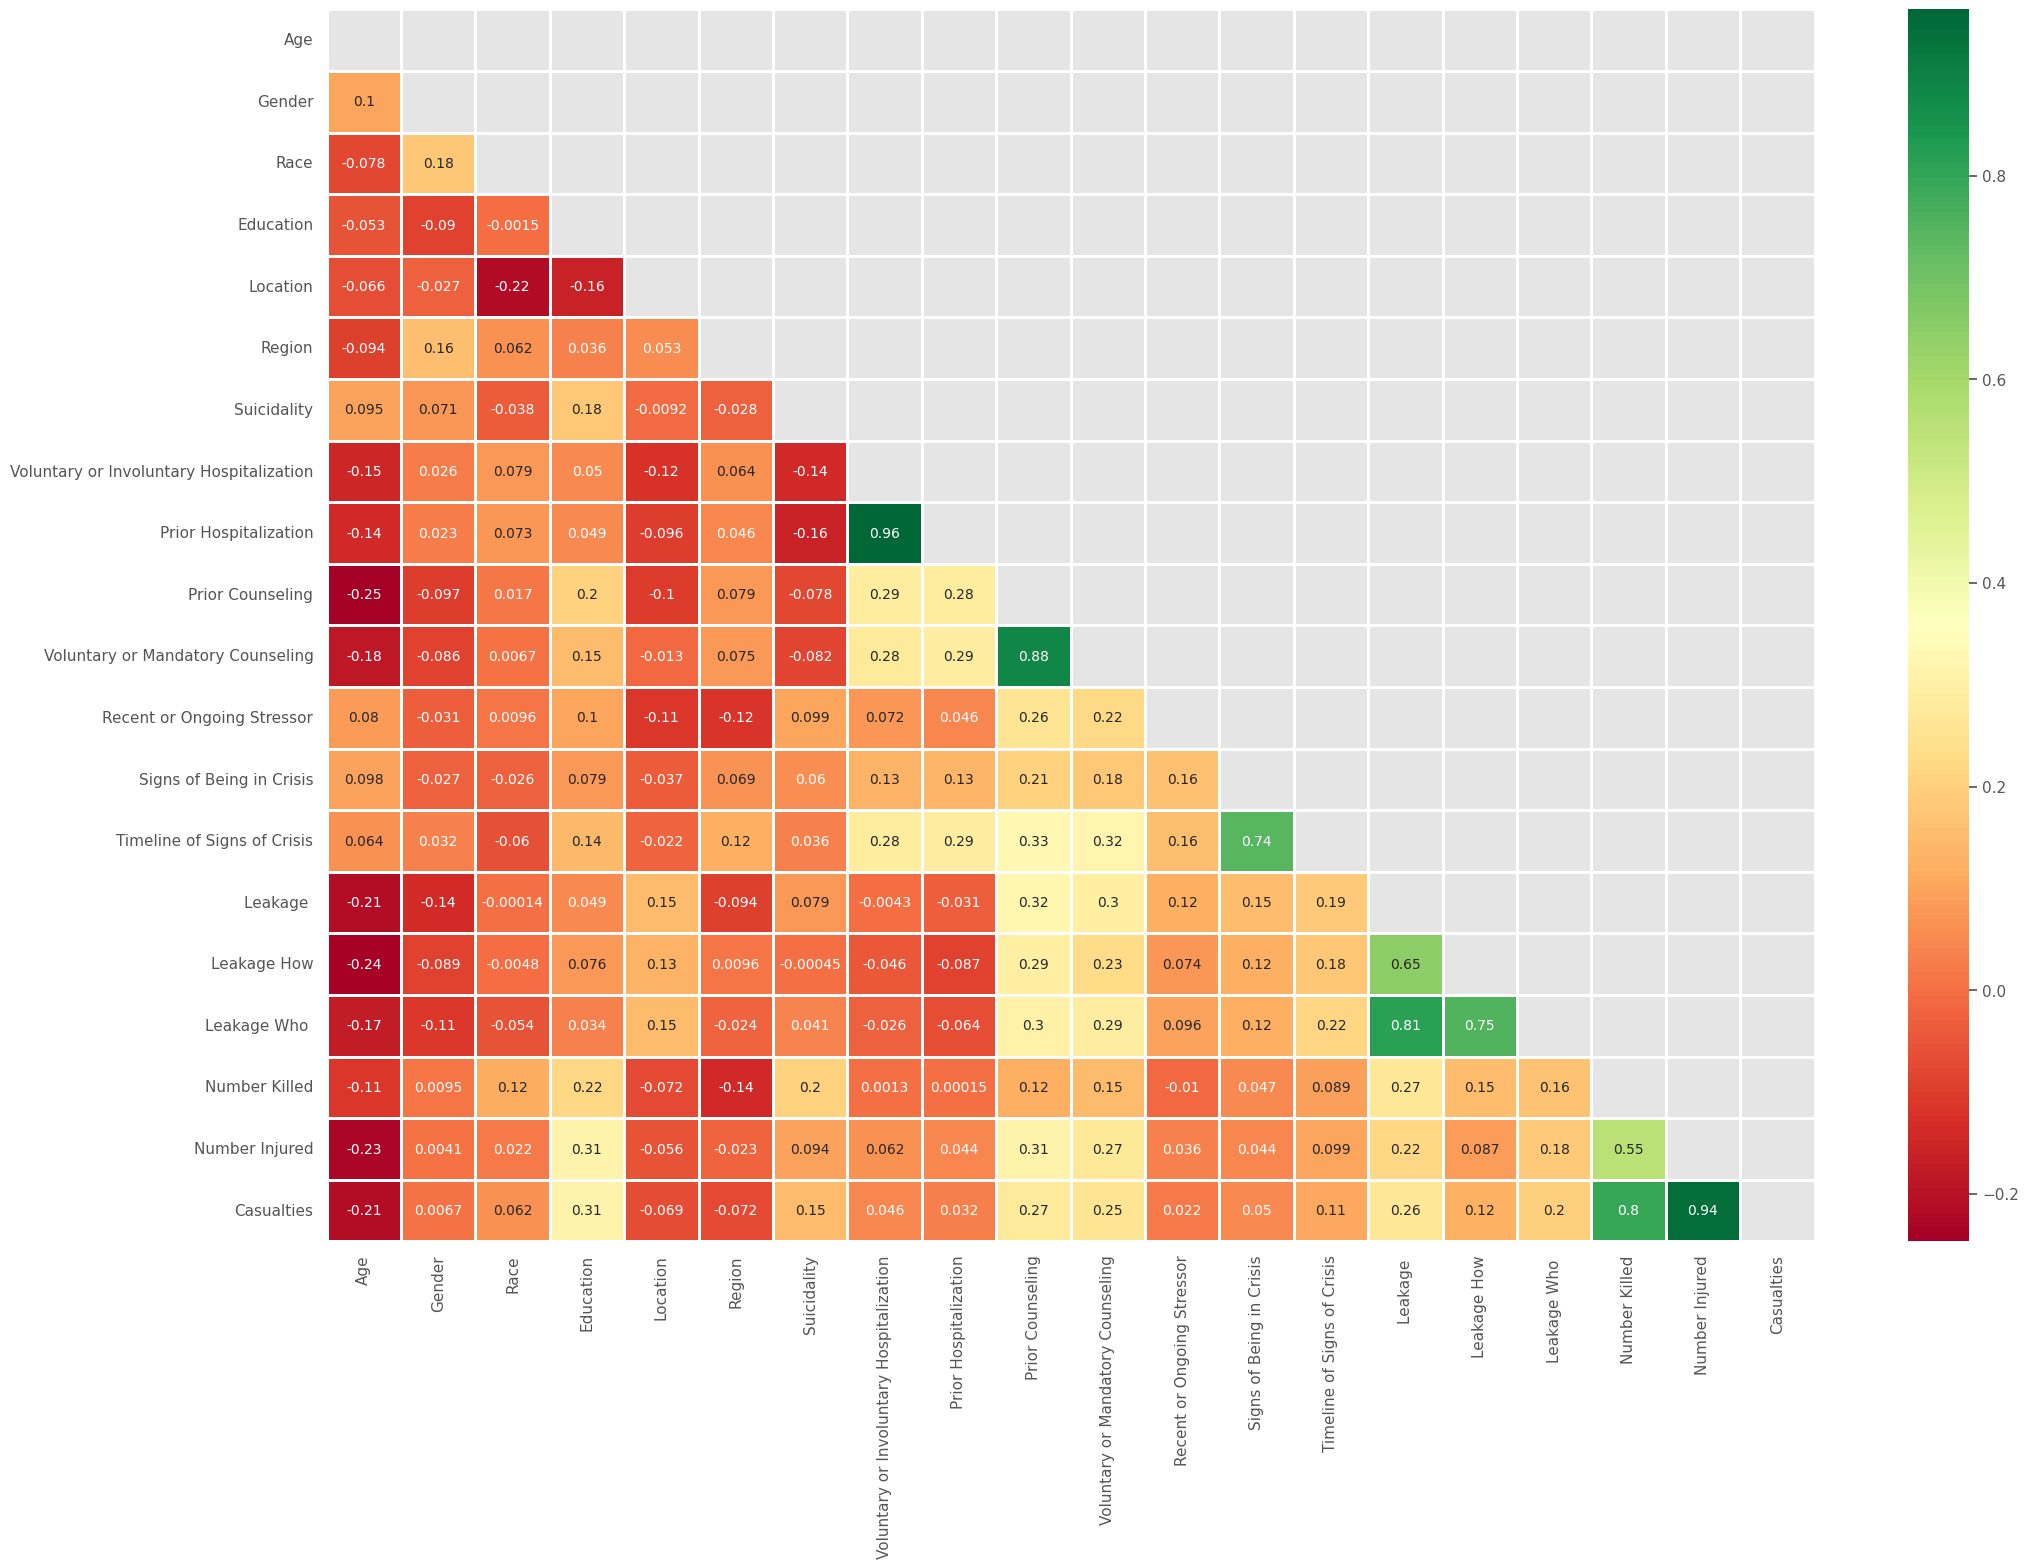

In [280]:
mask = np.zeros_like(my_data_hm.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (24,16))
sns.heatmap(my_data_hm.corr(), mask=mask, annot=True, cmap="RdYlGn", linewidths=.75)



In [281]:
my_data.describe()

Age    Location      Region  Number Killed  Number Injured  \
count  178.000000  178.000000  178.000000     178.000000      178.000000   
mean    33.741573    5.983146    1.438202       6.910112        6.477528   
std     12.180403    2.750397    1.284018       5.432982       10.041836   
min     11.000000    1.000000    0.000000       4.000000        0.000000   
25%     24.000000    4.000000    0.000000       4.000000        1.000000   
50%     33.000000    6.000000    1.000000       5.000000        3.000000   
75%     42.750000    8.000000    3.000000       7.000000        7.000000   
max     70.000000   11.000000    3.000000      49.000000       70.000000   

       Casualties  
count  178.000000  
mean    13.387640  
std     13.807444  
min      4.000000  
25%      6.000000  
50%      8.000000  
75%     15.000000  
max    102.000000

We can see that the average number of casualties is 13, and the average age of the shooter is 34 with a standard deviation of 12 years.

In [282]:
my_data

Age Gender Race Education  Location           City State  Region  \
0     25    0.0  0.0       2.0         1         Austin    TX       0   
1     18    0.0  0.0       0.0         4           Mesa    AZ       3   
2     39    0.0  0.0       2.0         9     Lock Haven    PA       2   
3     56    0.0  0.0        -1         5       Ironwood    MI       0   
4     31    0.0  1.0       2.0         8     Harrisburg    PA       2   
..   ...    ...  ...       ...       ...            ...   ...     ...   
175   21    0.0  4.0       1.0         4        Boulder    CO       3   
176   44    0.0  2.0        -1         6         Orange    CA       3   
177   19    0.0  0.0       0.0         9  Indianapolis     IN       1   
178   57    0.0  0.0       2.0         9       San Jose    CA       3   
179   15    0.0  0.0       0.0        11         Oxford    MI       1   

    Suicidality Voluntary or Involuntary Hospitalization  ...  \
0           2.0                                      0.0  ...   
1           1.0                                      0.0  ...   
2           2.0                                      0.0  ...   
3           0.0                                      0.0  ...   
4           1.0                                      0.0  ...   
..          ...                                      ...  ...   
175         0.0                                      0.0  ...   
176         0.0                                      0.0  ...   
177         1.0                                      0.0  ...   
178         1.0                                      0.0  ...   
179         0.0                                      0.0  ...   

    Voluntary or Mandatory Counseling Recent or Ongoing Stressor  \
0                                   1                          4   
1                                   0                          0   
2                                   0                          2   
3                                   0                          1   
4                                   0                          2   
..                                ...                        ...   
175                                 0                          0   
176                                 0                          0   
177                                 1                          7   
178                                 0                          2   
179                                 0                          0   

    Signs of Being in Crisis Timeline of Signs of Crisis Leakage  Leakage How  \
0                        1.0                         2.0      1.0           0   
1                        1.0                         3.0      0.0          -1   
2                        1.0                         2.0      0.0          -1   
3                        0.0                          -1      0.0          -1   
4                        1.0                         0.0      0.0          -1   
..                       ...                         ...      ...         ...   
175                      1.0                         3.0      0.0          -1   
176                      0.0                          -1      0.0          -1   
177                      1.0                         3.0      0.0          -1   
178                      1.0                         3.0      1.0           6   
179                      1.0                         2.0      1.0           6   

    Leakage Who  Number Killed Number Injured  Casualties  
0              0            15             31          46  
1             -1             5              2           7  
2             -1             6              6          12  
3             -1             7              2           9  
4             -1             4             17          21  
..           ...           ...            ...         ...  
175           -1            10              1          11  
176           -1             4              1           5  
177           -1 

In [283]:
my_data['Casualties'].value_counts()

6      22
4      20
8      19
7      18
5      15
9      14
11      8
10      7
15      4
20      4
17      4
16      4
14      4
12      4
36      4
21      3
45      3
25      2
46      2
35      1
58      1
82      1
49      1
48      1
40      1
24      1
34      1
33      1
30      1
29      1
28      1
27      1
23      1
19      1
13      1
102     1
Name: Casualties, dtype: int64

This shows us that most shootings in the data set have less than 10 casualties.

In [284]:
fig = px.bar(my_data, x='Casualties',y='Suicidality', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='stack', xaxis={'categoryorder':'total descending'},
    title='Total Casualties by Location',
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1, 2],
        ticktext = ['No evidence','Yes Prior', 'Not Prior']
    )
)
fig

In [285]:
fig = px.histogram(my_data, x='Location',color='Prior Hospitalization', height=600, width=900)
fig.update_layout(
    template="seaborn",barmode='group', 
    title='Distribution of Prior Hospitalization by Location',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
        ticktext = ['College/university','Government building / \nplace of civic importance',
                    'House of worship','Retail','Restaurant/bar/nightclub','Office','Place of residence','Outdoors',
                    'Warehouse/factory', 'Post office', 'K-12 school']
    )
)

fig

- Prior Hospitalization: 0=No Evidence, 1=Yes.

- Location: College/university = 1, Government building / place of civic importance = 2, House of worship = 3, Retail = 4, Restaurant/bar/nightclub = 5, Office = 6, Place of residence = 7, Outdoors = 8, Warehouse/factory = 9, Post office = 10, K-12 school = 11.

There are not many records of prior hospitalization records in the data set. The most number of records come from location 4(Retail) with 6. Location 1(College/Universities) is the only location were the majority of cases have a record of prior hospitalization.

In [286]:
fig = px.histogram(my_data, x='Location',color='Voluntary or Involuntary Hospitalization', height=600, width=900)
fig.update_layout(
    template="seaborn",barmode='group',
    title='Distribution of Location by Voluntary or Involuntary Hospitalization',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
        ticktext = ['College/university','Government building / \nplace of civic importance',
                    'House of worship','Retail','Restaurant/bar/nightclub','Office','Place of residence',
                    'Outdoors','Warehouse/factory', 'Post office', 'K-12 school']
    )
)
fig

- Voluntary or Involuntary Hospitalization: 0=No Evidence, 1=Voluntary, 2= Involuntary.

- Location: College/university = 1, Government building / place of civic importance = 2, House of worship = 3, Retail = 4, Restaurant/bar/nightclub = 5, Office = 6, Place of residence = 7, Outdoors = 8, Warehouse/factory = 9, Post office = 10, K-12 school = 11.

The only locations with a record of prior voluntary hospitalization are Retail, Place of residence, Outdoors, Warehouse/factory.

In [287]:
fig = px.histogram(my_data, x='Location',color='Suicidality', height=600, width=900)
fig.update_layout(
    template="seaborn",barmode='group',
    title='Distribution of Suicidality by Location',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
        ticktext = ['College/university','Government building / \nplace of civic importance',
                    'House of worship','Retail','Restaurant/bar/nightclub','Office','Place of residence',
                    'Outdoors','Warehouse/factory', 'Post office', 'K-12 school']
    )
)
fig

- Suicidality: 0=No Evidence, 1=Yes, at any point before the shooting, 2= Intended to die in shooting but had no previous suicidality.

- Location: College/university = 1, Government building / place of civic importance = 2, House of worship = 3, Retail = 4, Restaurant/bar/nightclub = 5, Office = 6, Place of residence = 7, Outdoors = 8, Warehouse/factory = 9, Post office = 10, K-12 school = 11.

K-12 school shooters were the most likely to have been suicidal prior to the shooting. Warehouse/factory and Retail shooters were not suicidal prior to the shooting, however they did intend to die in the shooting. 

In [288]:
fig = px.histogram(my_data, x='Location',color='Signs of Being in Crisis', height=600, width=850)
fig.update_layout(
    template="seaborn",barmode='group',
    title='Distribution of Signs of Being in Crisis by Location',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
        ticktext = ['College/university','Government building / \nplace of civic importance',
                    'House of worship','Retail','Restaurant/bar/nightclub','Office','Place of residence',
                    'Outdoors','Warehouse/factory', 'Post office', 'K-12 school']
    )
)
fig

Shooters of Retail, Restaurant/bar/nightclub, Office locations most often displayed signs of being in a crisis. 

In [289]:
fig = px.histogram(my_data, x='Location',color='Timeline of Signs of Crisis', height=600, width=850)
fig.update_layout(
    template="seaborn",barmode='group', 
    title='Distribution of Timeline of Signs of Crisis by Location',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
        ticktext = ['College/university','Government building / \nplace of civic importance',
                    'House of worship','Retail','Restaurant/bar/nightclub','Office','Place of residence',
                    'Outdoors','Warehouse/factory', 'Post office', 'K-12 school']
    )
)
fig

Timeline of Signs of Crisis: N/A = -1, Days before shooting = 0, Weeks before shooting = 1, Months before shooting = 2, Years before shooting = 3.

Shooters of retail locations most often displayed signs of being in a crisis years prior. Shooters of outdoor locations are the most implosive showing signs of being in a crisis only days prior to the event. 

In [290]:
fig = px.scatter(my_data, x='Location',y='Age', size='Casualties', height=600, width=900)
fig.update_layout(
    template="seaborn",barmode='group',
    title="Distribution of Number of Casualties by Location and Age",
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
        ticktext = ['College/university','Government building / \nplace of civic importance',
                    'House of worship','Retail','Restaurant/bar/nightclub','Office','Place of residence',
                    'Outdoors','Warehouse/factory', 'Post office', 'K-12 school']
    )
)
fig

- Location: College/university = 1, Government building / place of civic importance = 2, House of worship = 3, Retail = 4, Restaurant/bar/nightclub = 5, Office = 6, Place of residence = 7, Outdoors = 8, Warehouse/factory = 9, Post office = 10, K-12 school = 11.

Most shooter of K-12 schools are under the age of 20.

<AxesSubplot:title={'center':'Voluntary Prior Hospitalization'}, ylabel='Location'>

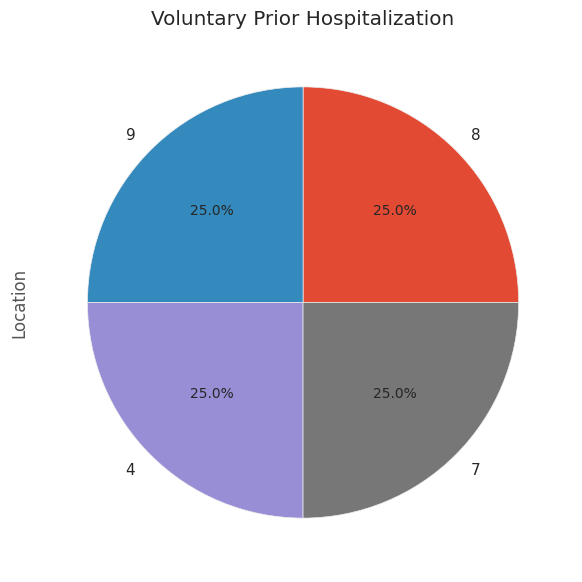

In [291]:
my_data.loc[(my_data['Prior Hospitalization']==1) & (my_data['Voluntary or Involuntary Hospitalization']==1),
            'Location'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='Voluntary Prior Hospitalization')

There are only 1 instances of  Voluntary Prior Hospitalization in each of 4 locations: Retail = 4, Place of residence = 7, Outdoors = 8, Warehouse/factory = 9.

<AxesSubplot:title={'center':'Involuntary Prior Hospitalization'}, ylabel='Location'>

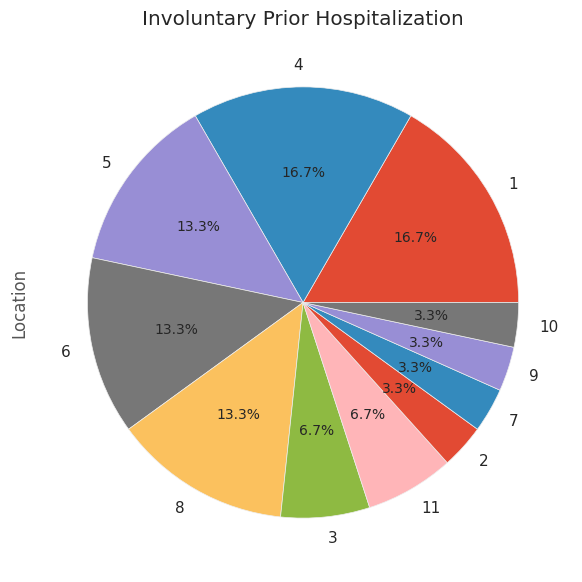

In [292]:
my_data.loc[(my_data['Prior Hospitalization']==1) & (my_data['Voluntary or Involuntary Hospitalization']==2),
            'Location'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='Involuntary Prior Hospitalization')

Retail = 4 and College/university = 1 have the highest percentage(16.7%) of Involuntary Prior Hospitalization.

Text(0.5, 1.0, 'Number of Shootings By State')

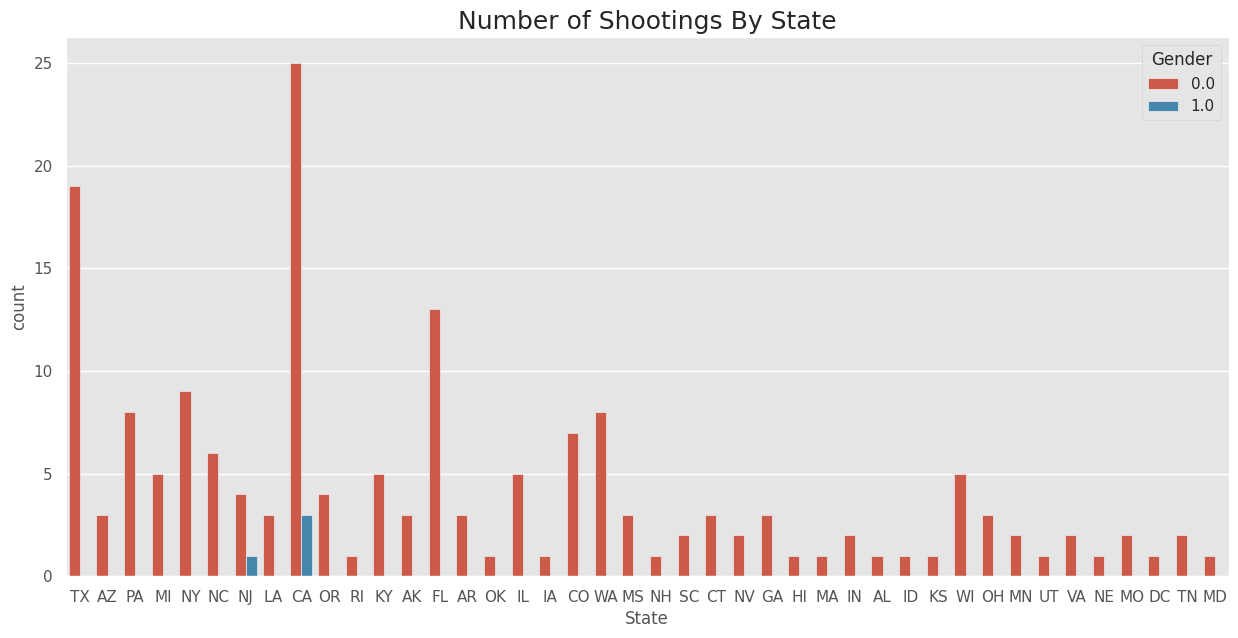

In [293]:
sns.countplot(data=my_data, x="State", hue="Gender")
plt.title('Number of Shootings By State', fontsize=18)

The top three states with the most shootings are California, Texas, and Florida.

In [294]:
fig = px.scatter(my_data, x='Recent or Ongoing Stressor',y='Casualties',  height=600, width=850)
fig.update_layout(
    template="seaborn",barmode='group', 
    title="Distribution of Number of Casualties by Location and Age",
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1, 2, 3, 4, 5, 6, 7],
        ticktext = ['No evidence','Recent break-up','Employment stressor','Economic stressor',
                    'Family issue','Legal issue','Other','Multiple Stressors']
    )
)
fig

Recent or Ongoing Stressors:  No evidence = 0, Recent break-up = 1, Employment stressors = 2, Economic stressors = 3, Family issue = 4, Legal issue = 5, Other = 6, Multiple = 7.

Employment Stressors are the most common stressors. Economic stressors are the least common.

________________________________________________________________________________________________________________________________________

Lets make a data frame of the total number of casualties per state.

In [295]:
state_shootings = my_data[['State', 'Casualties']]
state_shootings = state_shootings.groupby('State').sum('Casualties').reset_index()

In [296]:
state_shootings

State  Casualties
0     AK          21
1     AL           5
2     AR          36
3     AZ          30
4     CA         380
5     CO         186
6     CT          42
7     DC          20
8     FL         273
9     GA          41
10    HI           7
11    IA           6
12    ID           4
13    IL          53
14    IN          24
15    KS           7
16    KY          44
17    LA          29
18    MA           7
19    MD           8
20    MI          42
21    MN          24
22    MO          14
23    MS          26
24    NC          50
25    NE          13
26    NH           8
27    NJ          36
28    NV          16
29    NY          87
30    OH          60
31    OK          20
32    OR          77
33    PA          82
34    RI           4
35    SC          16
36    TN          15
37    TX         381
38    UT           9
39    VA          74
40    WA          69
41    WI          37

Now lets plot the the total number of casualties per state.

In [297]:
fig = px.choropleth(state_shootings, 
                    locations="State",  # DataFrame column with locations
                    color="Casualties",  # DataFrame column with color values
                    hover_name="State", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(title_text = 'Mass Shoting Casualties by State', geo_scope='usa',)

fig.show()

We can see that the states with the most casualties are Texas(381) followed by California(380), Florida(273), and Colorado(186). Note: This does not take into account the number of shootings or the states' population. 

In [298]:
# group by race
my_data.groupby("Location").size().sort_values()

Location
10     4
1      9
2      9
3     11
8     14
11    14
7     15
6     18
5     25
9     25
4     34
dtype: int64

<AxesSubplot:xlabel='Race'>

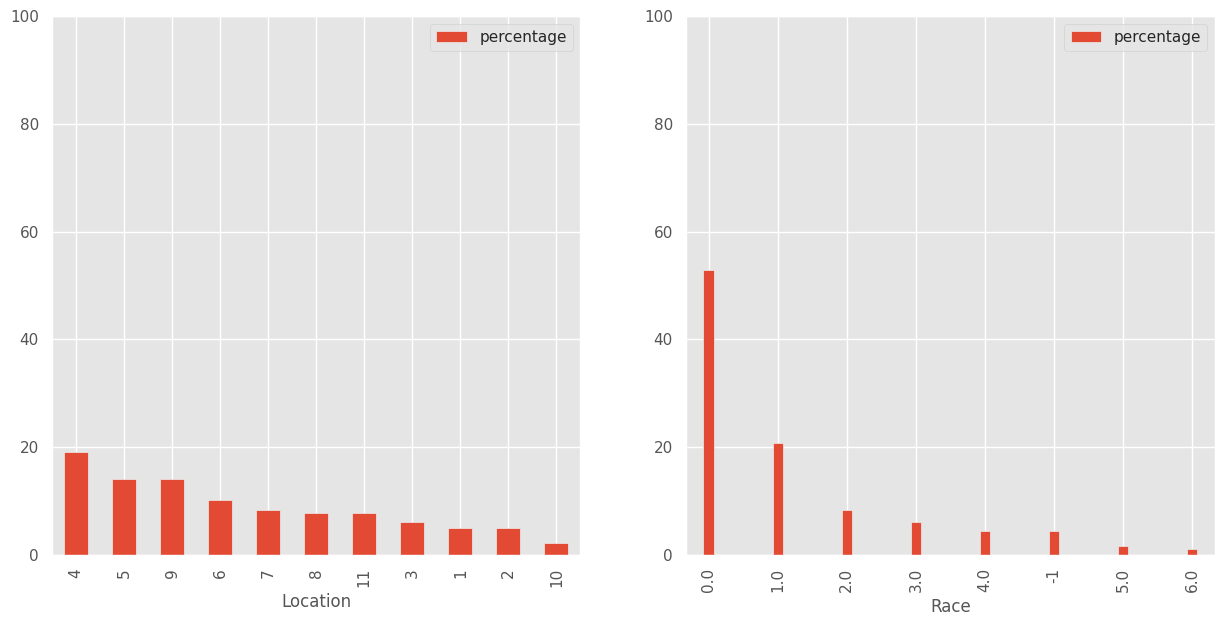

In [299]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)

s=my_data.Location.value_counts(normalize=True).mul(100) # mul(100) is == *100
s.index.name,s.name='Location','percentage' #setting the name of index and series
#series.to_frame() returns a dataframe
s.to_frame().plot(kind='bar', ax=ax1, ylim=[0,100])


s=my_data.Race.value_counts(normalize=True).mul(100) # mul(100) is == *100
s.index.name,s.name='Race','percentage' #setting the name of index and series
#series.to_frame() returns a dataframe
s.to_frame().plot(kind='bar', ax = ax2, ylim=[0,100], width=0.15)

Retail stores are the most common locations for mass shootings. And the most common race of the shooter is White.

# Prepare the Data to Model

In [300]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 179
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Age                                       178 non-null    int64 
 1   Gender                                    178 non-null    object
 2   Race                                      178 non-null    object
 3   Education                                 178 non-null    object
 4   Location                                  178 non-null    int64 
 5   City                                      178 non-null    object
 6   State                                     178 non-null    object
 7   Region                                    178 non-null    int64 
 8   Suicidality                               178 non-null    object
 9   Voluntary or Involuntary Hospitalization  178 non-null    object
 10  Prior Hospitalization                     178 non-

In [301]:
model_df = my_data[['Age', 'Gender', 'Race', 'Location', 'Suicidality', 'Voluntary or Involuntary Hospitalization','Prior Hospitalization', 
            'Prior Counseling', 'Voluntary or Mandatory Counseling', 'Recent or Ongoing Stressor',
            'Signs of Being in Crisis','Timeline of Signs of Crisis', 'Leakage ', 'Leakage How', 
            'Leakage Who ', 'Number Killed', 'Number Injured', 'Casualties']]

## Data Binning

In [302]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
model_df['Age_binned'] = pd.cut(model_df['Age'], bins=bin_age, labels=category_age)
model_df = model_df.drop(['Age'], axis = 1)

/tmp/ipykernel_94/2989347415.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [303]:
bin_Number_Killed = [0, 4, 9, 50]
category_Number_Killed = ['Low', 'Medium', 'High']
model_df['Number_Killed_binned'] = pd.cut(model_df['Number Killed'], bins=bin_Number_Killed, labels=category_Number_Killed)
model_df = model_df.drop(['Number Killed'], axis = 1)

In [304]:
bin_Number_Injured = [0, 10, 30, 70]
category_Number_Injured = ['Low', 'Medium', 'High']
model_df['Number_Injured_binned'] = pd.cut(model_df['Number Injured'], bins=bin_Number_Injured, labels=category_Number_Injured)
model_df = model_df.drop(['Number Injured'], axis = 1)

In [305]:
bin_Casualties = [0, 15, 45, 110]
category_Casualties = ['Low', 'Medium', 'High']
model_df['Casualties_binned'] = pd.cut(model_df['Casualties'], bins=bin_Casualties, labels=category_Casualties)
model_df = model_df.drop(['Casualties'], axis = 1)

## Set the Dummy Variables

We need to seperate the response variable from the predictor variables.

In [306]:
X = model_df.drop(["Location"], axis=1)
y = model_df["Location"]

In [307]:
X = pd.get_dummies(X)

## Split the Data

In [308]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

To increase the accuracy of our models, because we are using a small data set, we will split 33% test sample and 67% training sample.

In [309]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [310]:
print('The Shape Of The Original Data: ', model_df.shape)
print('The Shape Of x_test: ', x_test.shape)
print('The Shape Of x_train: ', x_train.shape)
print('The Shape Of y_test: ', y_test.shape)
print('The Shape Of y_train: ', y_train.shape)

The Shape Of The Original Data:  (178, 18)
The Shape Of x_test:  (59, 78)
The Shape Of x_train:  (119, 78)
The Shape Of y_test:  (59,)
The Shape Of y_train:  (119,)


This confirms that the test sample is 33% of the original data set.

## Balance the Training Set Using the SMOTE Technique

SMOTE or Synthetic Minority Oversampling Technique is an oversampling technique but SMOTE working differently than your typical oversampling.

In a classic oversampling technique, the minority data is duplicated from the minority data population. While it increases the number of data, it does not give any new information or variation to the machine learning model.

SMOTE works by utilizing a k-nearest neighbor algorithm to create synthetic data. SMOTE first start by choosing random data from the minority class, then k-nearest neighbors from the data are set. Synthetic data would then be made between the random data and the randomly selected k-nearest neighbor.

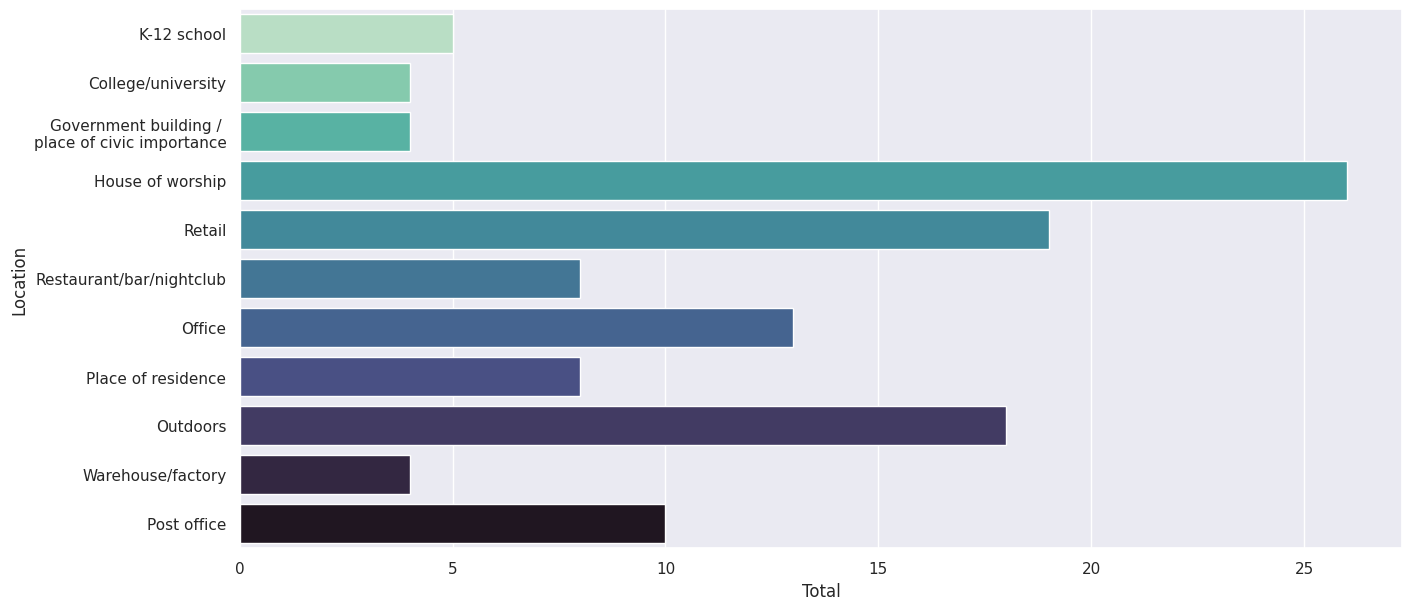

In [311]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=model_df, palette="mako_r")
plt.ylabel('Location')
plt.xlabel('Total')
plt.yticks([0, 1,2,3,4,5,6,7,8,9,10,], [ 'K-12 school','College/university','Government building / \nplace of civic importance',
                    'House of worship','Retail','Restaurant/bar/nightclub','Office','Place of residence',
                    'Outdoors','Warehouse/factory', 'Post office'])
plt.show()

This graph shows us that the training data set in not balanced.

In [312]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE(k_neighbors=1).fit_resample(x_train, y_train)

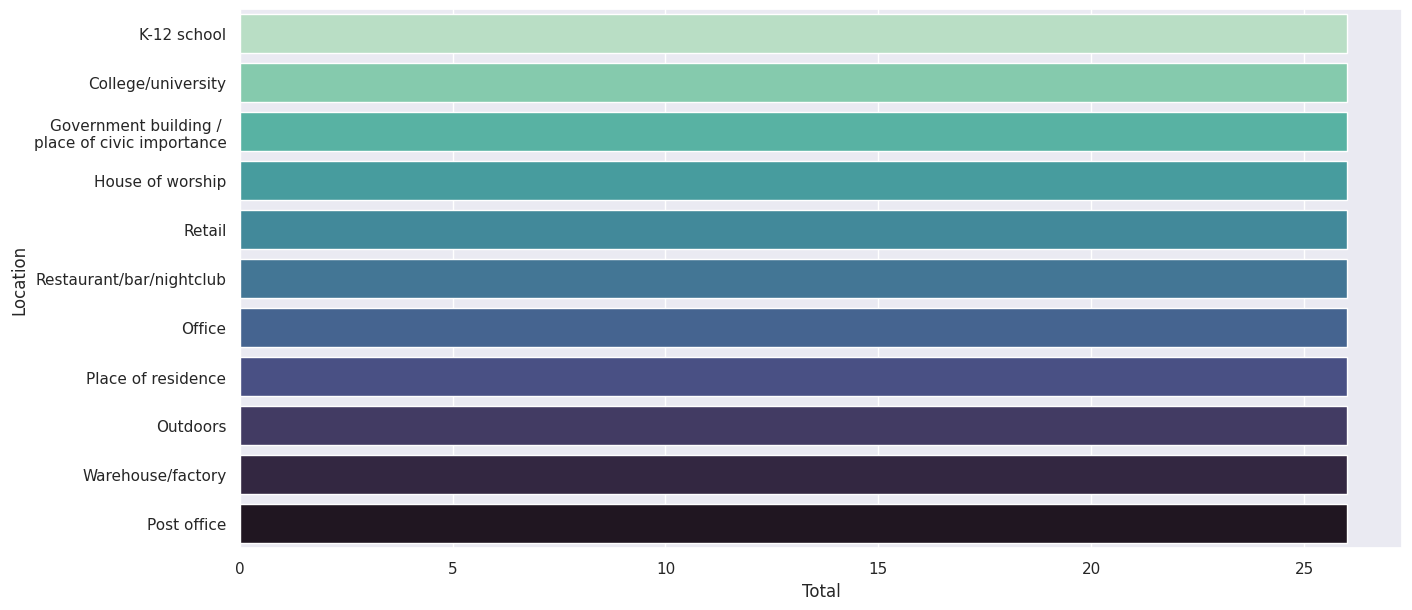

In [313]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=model_df, palette="mako_r")
plt.ylabel('Location')
plt.xlabel('Total')
plt.yticks([0, 1,2,3,4,5,6,7,8,9,10,], [ 'K-12 school','College/university','Government building / \nplace of civic importance',
                    'House of worship','Retail','Restaurant/bar/nightclub','Office','Place of residence',
                    'Outdoors','Warehouse/factory', 'Post office'])
plt.show()

This shows us that the training set has been balanced to the distribution of Location.

# Models

## Logistic Regression

In [314]:
from sklearn.linear_model import LogisticRegression

LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(x_train, y_train)

y_pred = LRclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score

LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.27      0.75      0.40         8
           5       0.17      0.33      0.22         6
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       0.30      0.43      0.35         7
          11       0.50      0.75      0.60         4

    accuracy                           0.24        59
   macro avg       0.12      0.23      0.16        59
weighted avg       0.12      0.24      0.16        59

[[0 0 0 3 0 0 0 0 0 1]
 [0 0 0 3 1 1 0 0 0 0]
 [1 0 0 2 0 0 1 1 1 1]
 [0 0 0 6 2 0 0 0 0 0]
 [1 0 0 1 2 0 0 0 1 1]
 [0 1 0 2 3 0 0 0 4 0]
 [0 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 3 0 1 0 0 0]
 [0 0 0 3 0 0 0 1 3 0]
 [0 0 0 0 1 0 0 0 0 3]]
Logistic R

## K-Nearest Neighbors

In [315]:
from sklearn.neighbors import KNeighborsClassifier

KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(x_train, y_train)

y_pred = KNclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.14      0.38      0.21         8
           5       0.11      0.33      0.17         6
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       0.21      0.43      0.29         7
          11       0.25      0.25      0.25         4

    accuracy                           0.15        59
   macro avg       0.07      0.14      0.09        59
weighted avg       0.07      0.15      0.10        59

[[0 0 0 2 0 0 0 0 1 1]
 [0 0 0 1 1 0 0 0 3 0]
 [0 0 0 2 1 0 1 0 2 1]
 [0 0 0 3 4 0 0 0 1 0]
 [0 0 0 3 2 0 0 0 0 1]
 [0 0 0 2 5 0 0 0 3 0]
 [0 0 0 1 0 0 0 0 1 0]
 [0 0 0 2 3 0 1 0 0 0]
 [0 0 0 3 1 0 0 0 3 0]
 [0 0 0 2 1 0 0 0 0 1]]
K Neighbou

## Support Vector Machine (SVM)

In [316]:
from sklearn.svm import SVC

SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(x_train, y_train)

y_pred = SVCclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.25      0.50      0.33         8
           5       0.15      0.33      0.21         6
           6       0.17      0.10      0.12        10
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       0.33      0.29      0.31         7
          10       0.00      0.00      0.00         0
          11       0.38      0.75      0.50         4

    accuracy                           0.25        59
   macro avg       0.18      0.25      0.20        59
weighted avg       0.19      0.25      0.21        59

[[3 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 2 1 1 0 0 1 0 0]
 [1 0 0 1 1 0 2 1 0 0 1]
 [0 0 0 4 2 1 0 0 0 0 1]
 [0 0 1 1 2 2 0 0 0 0 0]
 [0 1 0 3 1 1 0 0 2 1 1]
 [0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 2 4 

## Naive Bayes - 1 Categorical Naive Bayes

In [317]:
#from sklearn.naive_bayes import CategoricalNB

#NBclassifier1 = CategoricalNB()
#NBclassifier1.fit(x_train, y_train)

#y_pred = NBclassifier1.predict(x_test)

#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

#NBAcc1 = accuracy_score(y_pred,y_test)
#print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

## 2 Gaussian Naive Bayes

In [318]:
from sklearn.naive_bayes import GaussianNB

NBclassifier2 = GaussianNB()
NBclassifier2.fit(x_train, y_train)

y_pred = NBclassifier2.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels wit

## Decision Tree

In [319]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier = DTclassifier.fit(x_train, y_train)

y_pred = DTclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           1       0.33      0.25      0.29         4
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         6
           6       0.25      0.20      0.22        10
           7       0.03      0.50      0.05         2
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         7
          11       0.60      0.75      0.67         4

    accuracy                           0.14        59
   macro avg       0.15      0.19      0.14        59
weighted avg       0.13

### Plot the Decision Tree

In [320]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (20,20), dpi=600)
tree.plot_tree(DTclassifier, max_depth = 20, feature_names = X.columns, filled=True)
plt.show()

Decision trees place the nodes with least entropy (most information) at the top of the tree. Meaning that these features are yielding significantly more information than the other features.

### Test for Feature Importance

We can verify this further by creating a feature importance plot.


In [321]:
fi = DTclassifier.feature_importances_ #feature importance array
fi = pd.Series(data = fi, index = X.columns) #convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) #sort descending

/tmp/ipykernel_94/527160214.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



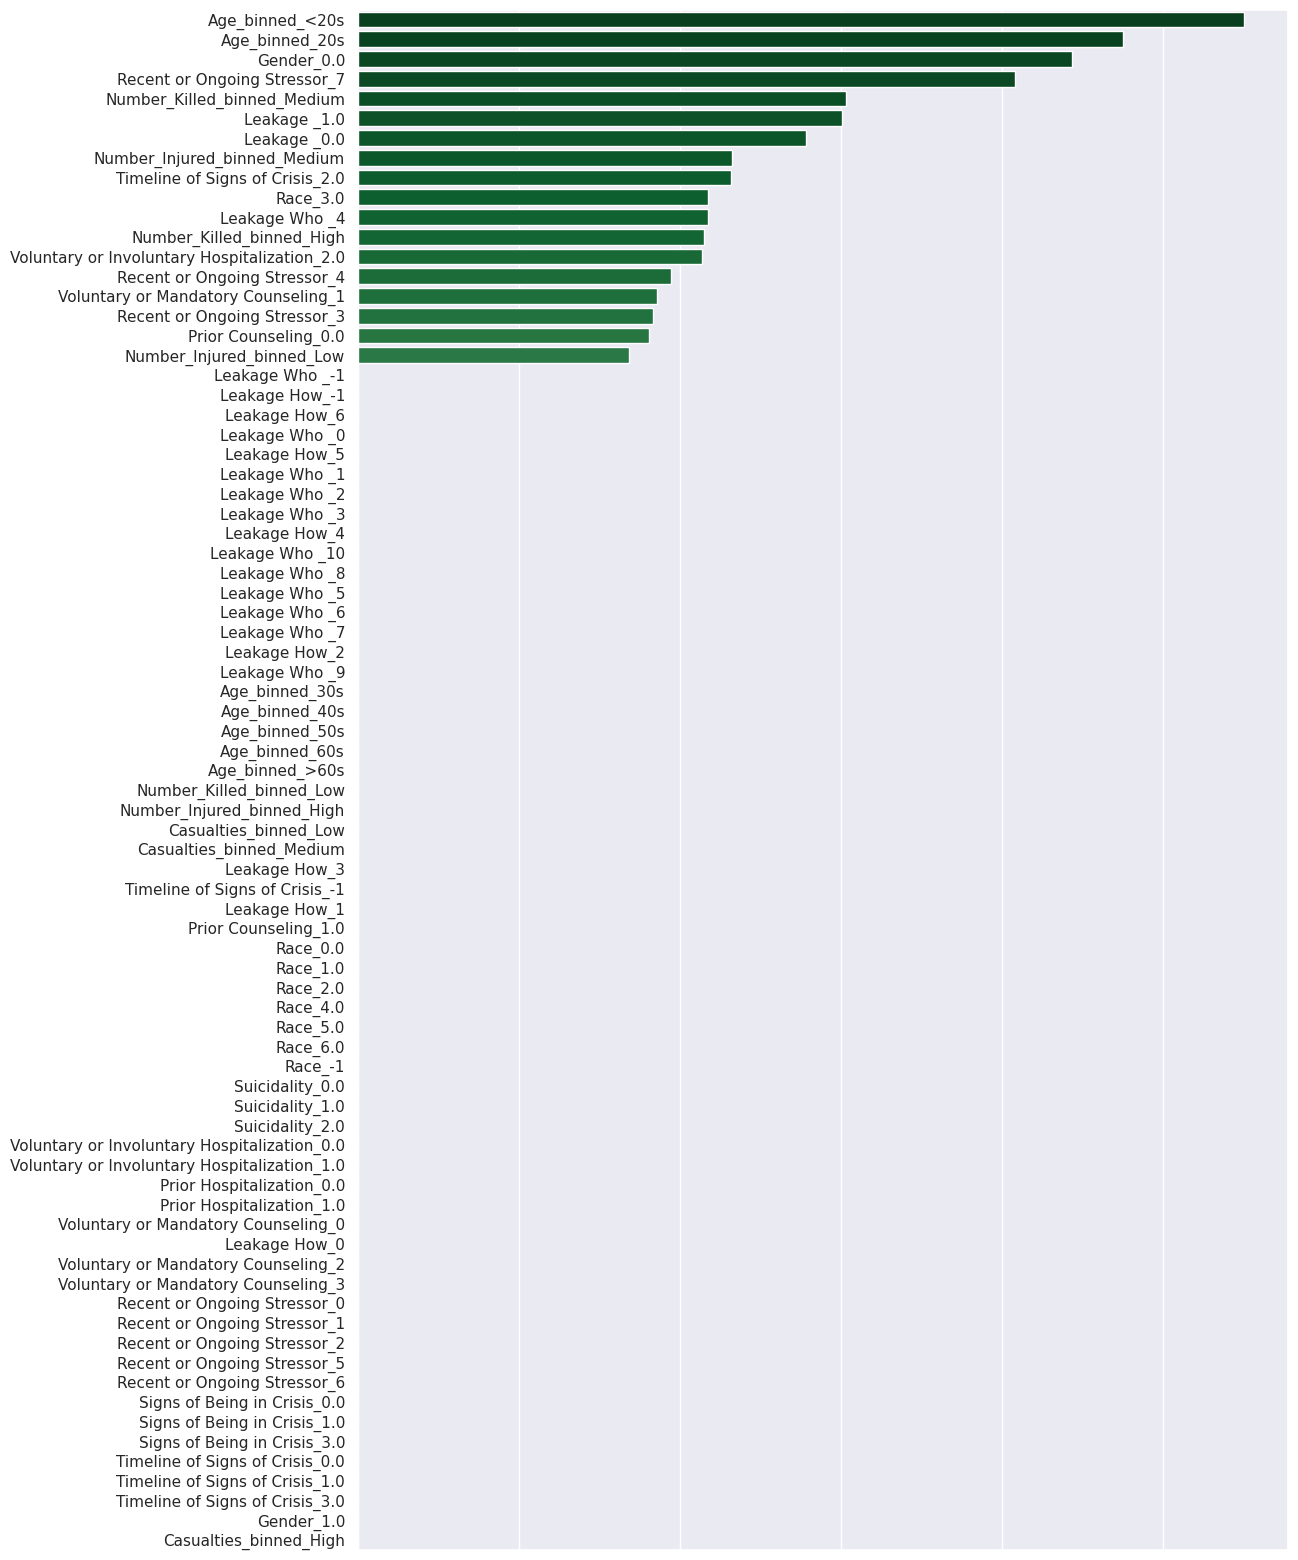

In [322]:
#create bar plot
plt.figure(figsize=(12, 20))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

This graph shows us the most important features from our model. In future models we should drop the unimportant variables.

## Random Forest

In [323]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(x_train, y_train)

y_pred = RFclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           1       0.33      0.25      0.29         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.17      0.38      0.23         8
           5       0.08      0.17      0.11         6
           6       1.00      0.10      0.18        10
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       0.50      0.43      0.46         7
          10       0.00      0.00      0.00         0
          11       0.43      0.75      0.55         4

    accuracy                           0.20        59
   macro avg       0.23      0.19      0.17        59
weighted avg       0.31      0.20      0.18        59

[[1 0 1 1 0 0 1 0 0 0 0]
 [1 0 0 1 1 0 0 0 1 1 0]
 [0 0 0 2 1 0 2 0 0 0 2]
 [0 0 0 3 3 0 0 1 0 0 1]
 [0 0 0 3 1 0 0 1 0 0 1]
 [0 1 0 3 3 1 0 0 2 0 0]
 [1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 3 

## Model Comparison

In [324]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Gaussian NB', 'Decision Tree', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, NBAcc2*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

Model   Accuracy
2                  SVM  25.423729
0  Logistic Regression  23.728814
5        Random Forest  20.338983
1          K Neighbors  15.254237
4        Decision Tree  13.559322
3          Gaussian NB  11.864407

NBAcc1*100,
 'Categorical NB',

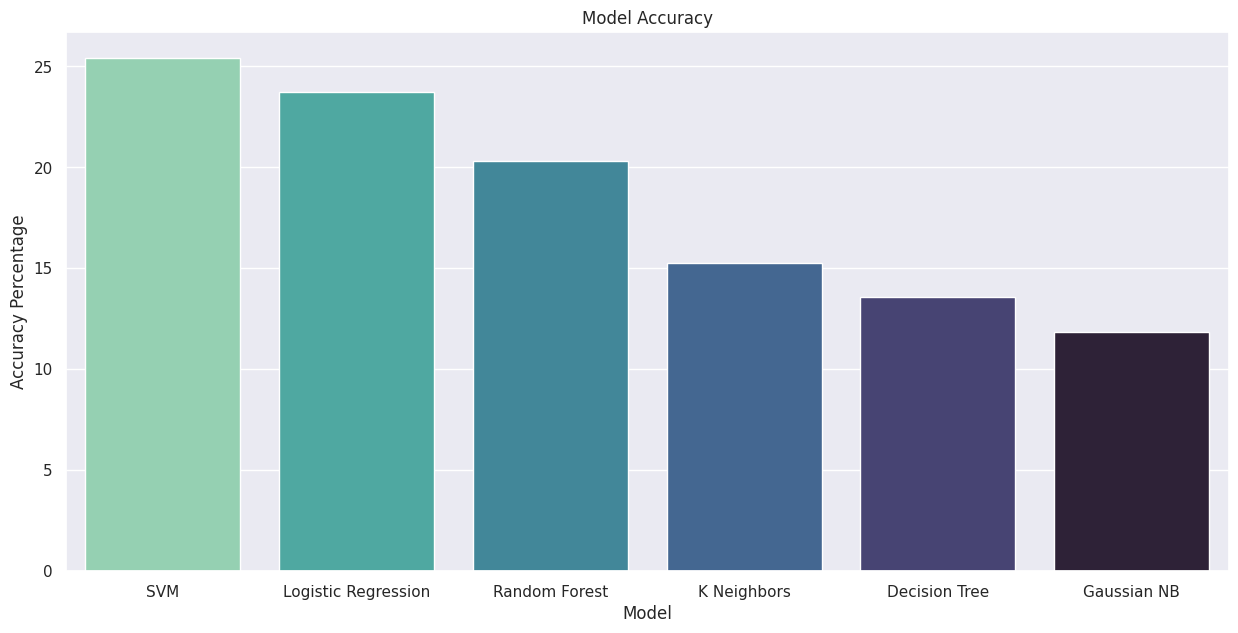

In [325]:
sns.set_theme(style="darkgrid")
sns.barplot(data=compare.sort_values(by='Accuracy', ascending=False), x='Model', y='Accuracy', palette="mako_r")
plt.ylabel('Accuracy Percentage')
plt.xlabel('Model')
plt.title('Model Accuracy')
plt.show()

In [326]:
fig = px.bar(compare.sort_values(by='Accuracy', ascending=False), x='Model', y='Accuracy')
fig.update_layout(
    template="seaborn", xaxis={'categoryorder':'total descending'},
    title='Model Accuracy')
fig.show()

# Models - Part 2

## Drop the unimportant Features

Lets run the models again, this time dropping the unimportant features. 

In [327]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 179
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Gender_0.0                                    178 non-null    uint8
 1   Gender_1.0                                    178 non-null    uint8
 2   Race_0.0                                      178 non-null    uint8
 3   Race_1.0                                      178 non-null    uint8
 4   Race_2.0                                      178 non-null    uint8
 5   Race_3.0                                      178 non-null    uint8
 6   Race_4.0                                      178 non-null    uint8
 7   Race_5.0                                      178 non-null    uint8
 8   Race_6.0                                      178 non-null    uint8
 9   Race_-1                                       178 non-null    uint8
 10  Suicidality_0.

In [328]:
X = X[['Age_binned_<20s', 'Voluntary or Mandatory Counseling_1', 'Casualties_binned_Low', 'Leakage How_-1',
        'Suicidality_1.0', 'Number_Killed_binned_High', 'Age_binned_20s', 'Suicidality_2.0', 'Recent or Ongoing Stressor_7',
        'Voluntary or Involuntary Hospitalization_2.0', 'Number_Injured_binned_Low', 'Race_-1', 'Timeline of Signs of Crisis_3.0',
        'Gender_1.0', 'Recent or Ongoing Stressor_3', 'Race_1.0', 'Voluntary or Involuntary Hospitalization_0.0']]

In [329]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 179
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Age_binned_<20s                               178 non-null    uint8
 1   Voluntary or Mandatory Counseling_1           178 non-null    uint8
 2   Casualties_binned_Low                         178 non-null    uint8
 3   Leakage How_-1                                178 non-null    uint8
 4   Suicidality_1.0                               178 non-null    uint8
 5   Number_Killed_binned_High                     178 non-null    uint8
 6   Age_binned_20s                                178 non-null    uint8
 7   Suicidality_2.0                               178 non-null    uint8
 8   Recent or Ongoing Stressor_7                  178 non-null    uint8
 9   Voluntary or Involuntary Hospitalization_2.0  178 non-null    uint8
 10  Number_Injured

## Split the data

In [330]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [331]:
print('The Shape Of The Original Data: ', model_df.shape)
print('The Shape Of x_test: ', x_test.shape)
print('The Shape Of x_train: ', x_train.shape)
print('The Shape Of y_test: ', y_test.shape)
print('The Shape Of y_train: ', y_train.shape)

The Shape Of The Original Data:  (178, 18)
The Shape Of x_test:  (59, 17)
The Shape Of x_train:  (119, 17)
The Shape Of y_test:  (59,)
The Shape Of y_train:  (119,)


## Balance the data

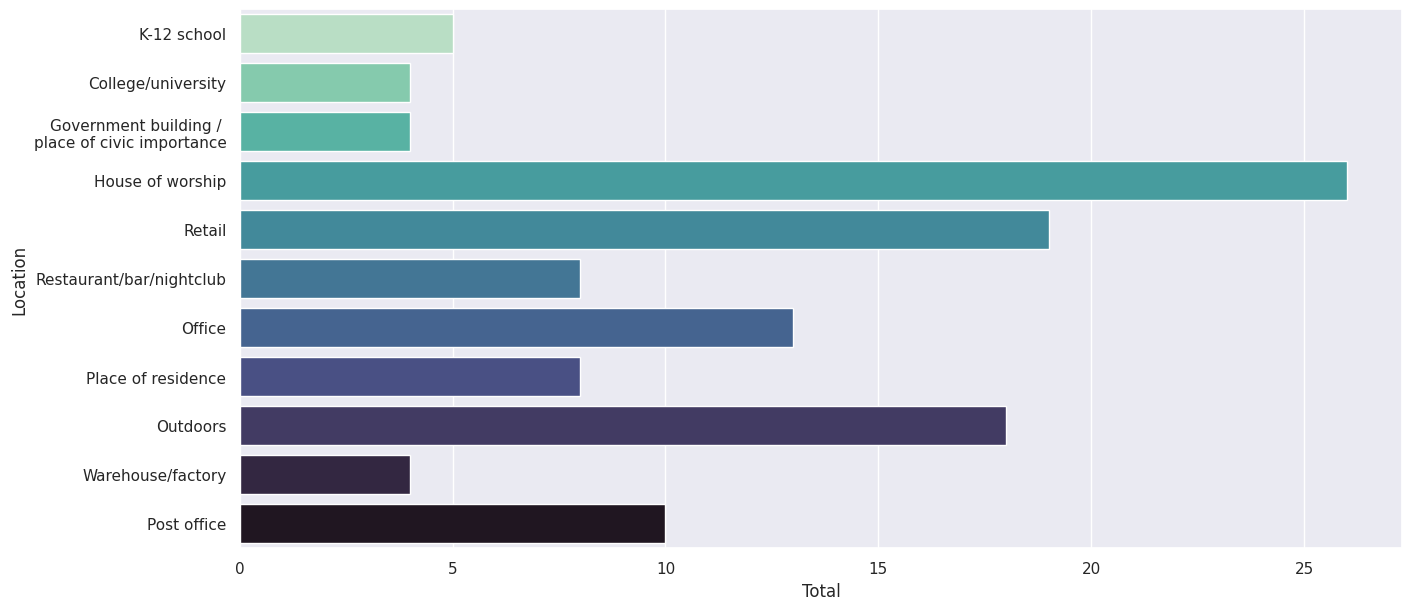

In [332]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=model_df, palette="mako_r")
plt.ylabel('Location')
plt.xlabel('Total')
plt.yticks([0, 1,2,3,4,5,6,7,8,9,10,], [ 'K-12 school','College/university','Government building / \nplace of civic importance',
                    'House of worship','Retail','Restaurant/bar/nightclub','Office','Place of residence',
                    'Outdoors','Warehouse/factory', 'Post office'])
plt.show()

In [333]:
x_train, y_train = SMOTE(k_neighbors=1).fit_resample(x_train, y_train)

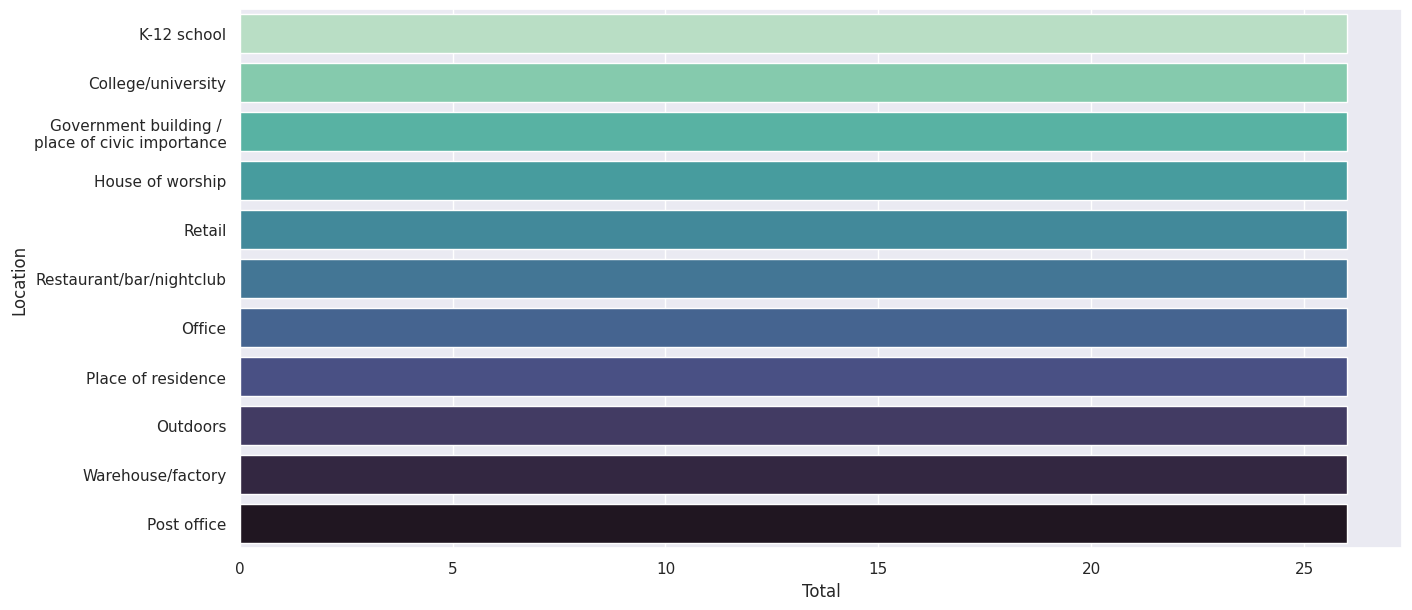

In [334]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=model_df, palette="mako_r")
plt.ylabel('Location')
plt.xlabel('Total')
plt.yticks([0, 1,2,3,4,5,6,7,8,9,10,], [ 'K-12 school','College/university','Government building / \nplace of civic importance',
                    'House of worship','Retail','Restaurant/bar/nightclub','Office','Place of residence',
                    'Outdoors','Warehouse/factory', 'Post office'])
plt.show()

## Logistic Regression

In [335]:
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(x_train, y_train)

y_pred = LRclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score

LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.33      0.20      0.25         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         8
           5       0.11      0.17      0.13         6
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         2
           8       0.14      0.17      0.15         6
           9       0.33      0.57      0.42         7
          11       0.60      0.75      0.67         4

    accuracy                           0.17        59
   macro avg       0.15      0.19      0.16        59
weighted avg       0.13      0.17      0.15        59

[[0 0 0 1 0 1 1 1 0 0]
 [0 1 0 0 0 1 1 1 1 0]
 [0 0 0 1 1 2 1 1 1 0]
 [0 0 0 0 1 0 3 2 1 1]
 [0 1 0 3 1 0 1 0 0 0]
 [0 1 0 1 4 0 1 0 3 0]
 [0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 3 1 1 0]
 [0 0 0 0 1 0 0 1 4 1]
 [0 0 0 0 0 0 1 0 0 3]]
Logistic R

## K-Nearest Neighbors

In [336]:
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(x_train, y_train)

y_pred = KNclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.12      0.20      0.15         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         8
           5       0.11      0.33      0.17         6
           6       0.00      0.00      0.00        10
           7       0.07      0.50      0.12         2
           8       0.00      0.00      0.00         6
           9       0.14      0.14      0.14         7
          11       0.40      0.50      0.44         4

    accuracy                           0.12        59
   macro avg       0.09      0.17      0.10        59
weighted avg       0.07      0.12      0.08        59

[[0 0 0 0 2 0 0 1 0 1]
 [0 1 0 0 0 0 2 1 1 0]
 [0 1 0 1 1 1 2 0 1 0]
 [0 0 0 0 4 1 0 0 2 1]
 [0 3 0 0 2 0 0 1 0 0]
 [0 2 0 0 5 0 2 0 1 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 4 0 2 0 0 0]
 [0 0 0 1 0 0 4 0 1 1]
 [0 1 0 0 0 0 1 0 0 2]]
K Neighbou

## SVM Model

In [337]:
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(x_train, y_train)

y_pred = SVCclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           1       1.00      0.25      0.40         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.10      0.25      0.14         8
           5       0.06      0.17      0.09         6
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       1.00      0.14      0.25         7
          11       0.60      0.75      0.67         4

    accuracy                           0.14        59
   macro avg       0.28      0.16      0.16        59
weighted avg       0.25      0.14      0.13        59

[[1 0 0 2 0 0 1 0 0 0]
 [0 0 0 2 0 0 2 1 0 0]
 [0 0 0 3 1 1 1 1 0 0]
 [0 0 0 2 3 0 1 1 0 1]
 [0 0 0 4 1 1 0 0 0 0]
 [0 1 0 3 5 0 1 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 1 4 0 1 0 0 0]
 [0 0 0 2 1 0 2 0 1 1]
 [0 0 0 0 0 0 1 0 0 3]]
SVC accura

## 2 Gaussian Naive Bayes

In [338]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(x_train, y_train)

y_pred = NBclassifier2.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.11      0.25      0.15         8
           5       0.25      0.17      0.20         6
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       0.12      0.14      0.13         7
          11       0.00      0.00      0.00         4

    accuracy                           0.07        59
   macro avg       0.05      0.06      0.05        59
weighted avg       0.05      0.07      0.06        59

[[0 0 0 1 1 0 2 0 0 0]
 [0 0 0 2 0 0 2 0 1 0]
 [0 0 0 2 0 0 4 0 1 0]
 [0 0 0 2 1 0 4 0 1 0]
 [0 0 0 3 1 0 2 0 0 0]
 [0 0 0 2 0 0 6 0 2 0]
 [0 0 0 0 1 0 0 0 1 0]
 [0 0 0 2 0 0 3 0 1 0]
 [0 0 0 2 0 0 4 0 1 0]
 [0 0 0 3 0 0 1 0 0 0]]
Gaussian N

## Decision Tree

In [339]:
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier = DTclassifier.fit(x_train, y_train)

y_pred = DTclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         6
           6       0.10      0.10      0.10        10
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       0.11      0.57      0.19         7
          10       0.00      0.00      0.00         0
          11       0.60      0.75      0.67         4

    accuracy                           0.14        59
   macro avg       0.07      0.13      0.09        59
weighted avg       0.07      0.14      0.08        59

[[0 0 1 0 0 2 0 0 1 0 0]
 [1 0 1 0 0 1 0 0 2 0 0]
 [0 0 0 0 0 1 0 0 5 1 0]
 [0 0 0 0 0 0 0 1 6 0 1]
 [2 0 0 0 0 3 0 0 1 0 0]
 [0 1 0 0 0 1 0 0 8 0 0]
 [0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 

### Plot the Decision Tree

In [340]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (20,20), dpi=600)
tree.plot_tree(DTclassifier, max_depth = 20, feature_names = X.columns, filled=True)
plt.show()

### Test for important features

In [341]:
fi = DTclassifier.feature_importances_ #feature importance array
fi = pd.Series(data = fi, index = X.columns) #convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) #sort descending

/tmp/ipykernel_94/527160214.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



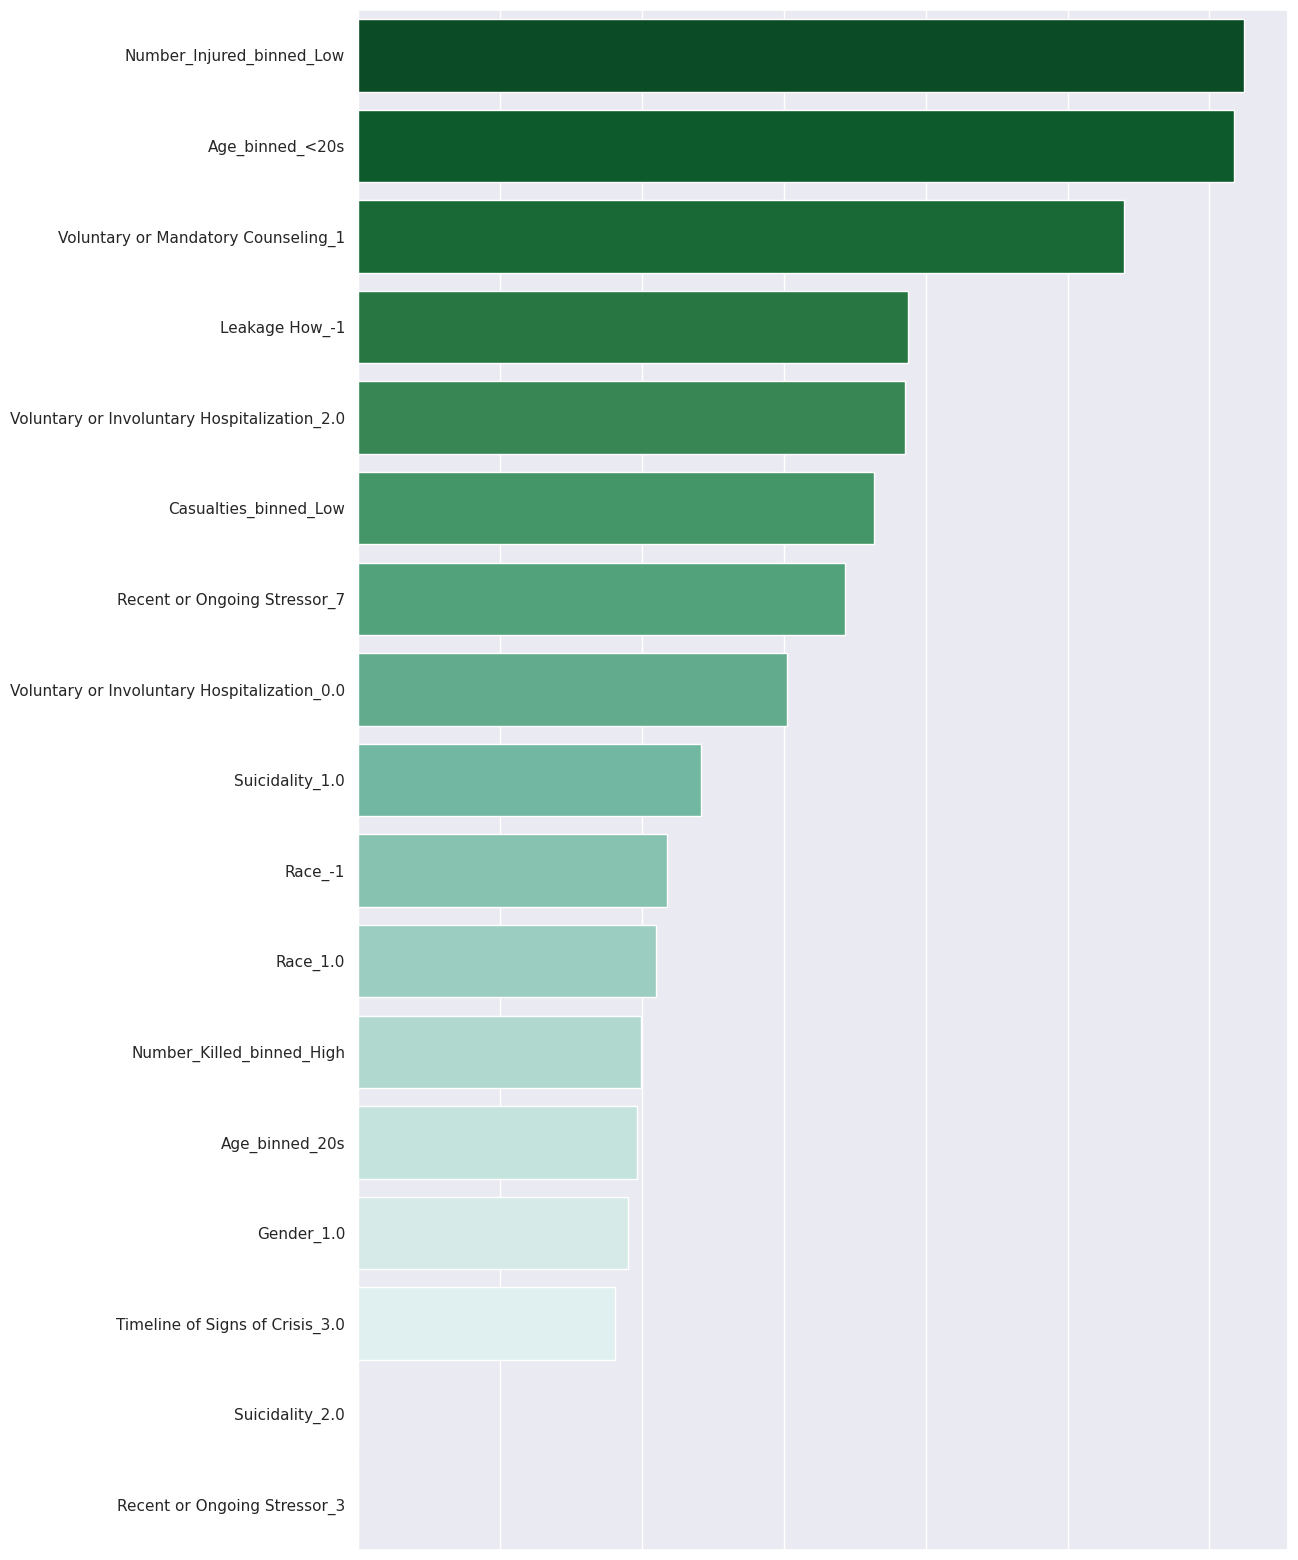

In [342]:
#create bar plot
plt.figure(figsize=(12, 20))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Random Forrest

In [343]:
RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(x_train, y_train)

y_pred = RFclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           1       0.25      0.25      0.25         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         8
           5       0.17      0.17      0.17         6
           6       0.50      0.10      0.17        10
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       0.19      0.43      0.26         7
          11       0.38      0.75      0.50         4

    accuracy                           0.15        59
   macro avg       0.15      0.17      0.13        59
weighted avg       0.17      0.15      0.13        59

[[1 0 1 0 0 0 0 0 1 1]
 [2 0 1 0 0 0 0 0 2 0]
 [0 0 0 2 0 0 1 0 3 1]
 [0 0 0 0 2 0 1 2 2 1]
 [1 0 1 1 1 1 0 1 0 0]
 [0 1 0 0 2 1 2 0 4 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 1 0 4 0 1 0]
 [0 0 0 0 0 0 2 0 3 2]
 [0 0 0 0 0 0 0 1 0 3]]
Random For

## Comparison 

In [344]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Gaussian NB', 'Decision Tree', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, NBAcc2*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

Model   Accuracy
0  Logistic Regression  16.949153
5        Random Forest  15.254237
2                  SVM  13.559322
4        Decision Tree  13.559322
1          K Neighbors  11.864407
3          Gaussian NB   6.779661

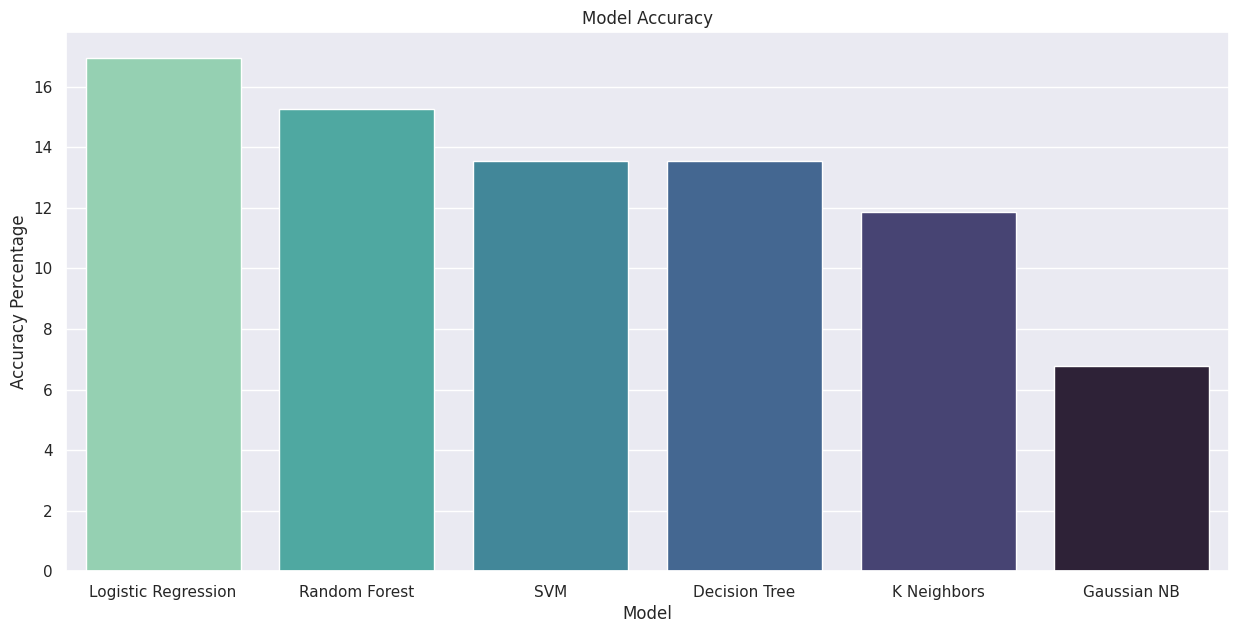

In [345]:
sns.set_theme(style="darkgrid")
sns.barplot(data=compare.sort_values(by='Accuracy', ascending=False), x='Model', y='Accuracy', palette="mako_r")
plt.ylabel('Accuracy Percentage')
plt.xlabel('Model')
plt.title('Model Accuracy')
plt.show()

The models appear to be significantly less accurate after dropping the unimportant features.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d01f7ab8-3605-452d-b94a-e46cd3d638ed' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>